Initialization

Mathematic explanations : https://machinelearnia.com/regression-lineaire-simple/

In [635]:
# Force external files reload
%reload_ext autoreload
%autoreload 2
import myvars as v

# Import modules
import csv
import numpy as np
import matplotlib.pyplot as plt
import os.path

# Location of the dataset
DATA_LOCATION = '../data/data.csv'

# Creating a fresh theta vars files
theta = v.init(True)

Theta file initialized


Retrieving Dataset

In [636]:
# Checking dataset existence
if (os.path.exists(DATA_LOCATION) != True):
	print('Dataset doesn\'t exists at ' + DATA_LOCATION)
	raise KeyboardInterrupt()

print('We assume that the dataset is correctly formated with valid data')
# Openning data file and parsing it into 2 lists
file = open(DATA_LOCATION, "r")
reader = csv.reader(file)
next(reader)
km = []
price = []
for row in reader:
	km.append(row[0])
	price.append(row[1])

We assume that the dataset is correctly formated with valid data


Filling and shaping matixes, then representing dataset

x is a (24, 1) matrix filled with mileages values
y is a (24, 1) matrix filled with prices values
Data graph :


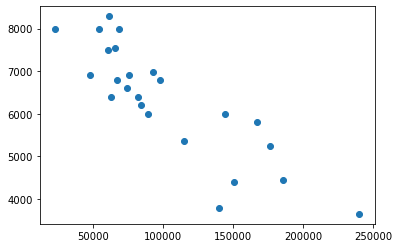

In [637]:
# Getting matrixes dimmensions infos
m = len(km)
# Creating empty numpy arrays then filling them with values from dataset
x = np.empty((m, 1), float)
i = 0
for num in km:
	x[i, 0] = float(km[i])
	i += 1
y = np.empty((m, 1), float)
i = 0
for num in price:
	y[i, 0] = float(price[i])
	i += 1

print('x is a', x.shape, 'matrix filled with mileages values')
print('y is a', y.shape, 'matrix filled with prices values')

# Printing a graph reprensenting the dataset
print('Data graph :')
plt.scatter(x, y)
plt.show()

Preventing from overflows by normalizing the dataset

In [638]:
# Normalization to keep 0 <= values <= 1 and preventing future overflows
def normalize(nb):
    return (nb - min(nb)) / (max(nb) - min(nb))

backup = x
x = normalize(x)

Adding bias column and setting random theta values

In [639]:
# Adding bias column to x
X = np.hstack((x, np.ones(x.shape)))
print('X is a', x.shape, 'matrix filled with mileages values and a bias column')
# Setting random initial theta values
theta = np.random.randn(2, 1)
print('Initial theta values (random), theta0 = ' + str(theta[0]) + ' $, theta1 = ' + str(theta[1]) + ' $/km')

X is a (24, 1) matrix filled with mileages values and a bias column
Initial theta values (random), theta0 = [-0.07235586] $, theta1 = [-0.87961677] $/km


Gradient descent functions definitions

In [640]:
# TBH, setting the formula as F = theta0 + theta1 * x is complete garbagem theta0 and theta1 should be inverted
# The model contains all predictions in a single matrix, here is the demonstration
#		F 		=		X 		.	theta	=	theta0 + theta1 * x
#  [predict(0)	   [x(0),	1
#	predict(1)		x(1),	1	   [theta1
#	predict(2)	=	x(2),	1	.	theta0]
#	...				...
#	predict(m)]		x(m),	1]
def model(X, theta):
	return X.dot(theta)

# Difference = (model(X, theta) - y)
# Average difference = 1 / m * sum(differences)
# The cost function returns the mean squared error (average euclidean distance between prediction and value from dataset) divided by 2
def cost_function(X, y, theta):
	m = len(y)
	return 1/(2*m) * np.sum((model(X, theta) - y)**2)

# Note : we are searching the theta values such as MSE with this vector is minimal
# The gradient is the vector representing first derivative of the cost function, meaning that adjusting theta in this direction is minimizing MSE
def grad(X, y, theta):
	m = len(y)
	return 1/m * X.T.dot(model(X, theta) - y)

# Proper learning phase, 
def gradient_descent(X, y, theta, learning_rate, n_iterations):
	# Initializing MSE history matrix
	cost_history = np.zeros(n_iterations)
	# For a (defined in next cell) number of iterations
	for i in range(0, n_iterations):
		# Correcting theta value by substracting a part of the gradient to move in a way to minimize MSE
		# Learning rate is not high because you don't want to got too far from where you were to prevent from boucing
		# 	from a "side of point with minimal MSE" to the other (look at a basic square function, if you are on the left side of the minimum you want to
		# 	go to the other side but keep approaching iteration by iteration)
		# Learning rate too low would also result in a slow approch, which is not desired either. You need to try some values and see how it goes to adjust
		theta -= learning_rate * grad(X, y, theta)
		# Adding current MSE to history
		cost_history[i] = cost_function(X, y, theta)
	# Returning final adjusted value
	return theta, cost_history

Setting learning variables and representing

Graph before learning :


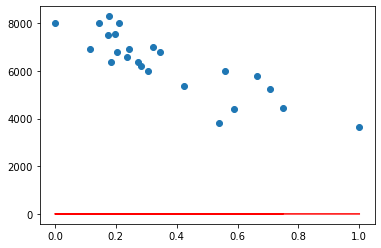

In [641]:
# Number of times the program will iterate
n_iterations = 2000
# Multiplication factor of the MSE to prevent from over reacting
learning_rate = 0.05

# Printing graph and initial function before learning
print('Graph before learning :')
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')

Learning, saving and showing results, then reprensenting again

In [642]:
# Learning phase
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

Final theta values, theta0 = [-0.01920798] $/km, theta1 = [7990.75626393] $
Graph after learning :


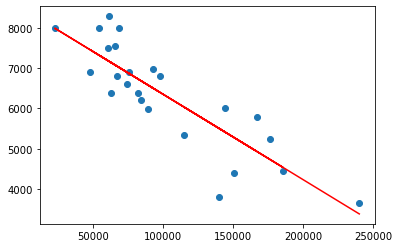

In [643]:
# Filling a matrix with predictions (Predictions = X . theta)
predictions = model(X, theta_final)

# Reverting normalization to get back to initial values
theta_final[0] = theta_final[0] / ((max(backup) - min(backup)) + min(backup))
x = x * (max(backup) - min(backup)) + min(backup)
# Theta file updating
file = open(v.THETA_LOCATION, "w")
file.write(str(theta_final[0]).replace('[', '').replace(']', '') + ',' + str(theta_final[1]).replace('[', '').replace(']', ''))
file.close()
# Final theta values report
print('Final theta values, theta0 = ' + str(theta_final[0]) + ' $/km, theta1 = ' + str(theta_final[1]) + ' $')

# Printing graph and function after learning
print('Graph after learning :')
plt.scatter(x, y)
plt.plot(x, predictions, c='r')
plt.show()

Representing cost function history (mean squared error evolution over iterations)

Learning curve :


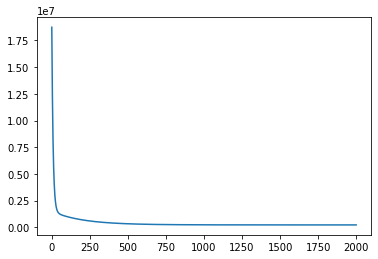

In [644]:
# Representing learning curve / MSE over iterations
print('Learning curve :')
plt.plot(range(n_iterations), cost_history)
plt.show()

In [645]:
# Calculating determination coefficient and printing it
u = ((y - predictions) ** 2).sum()
v = ((y - y.mean()) ** 2).sum()
print('Determination cofficient :', 1 - u / v)

Determination cofficient : 0.7329006015676721
